#Studi Kasus: Menggunakan KNN untuk prediksi Cuaca

#Menghubungkan dengan google collab

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/praktikum_ml/praktikum10"

Mounted at /content/drive


#Import Library

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE

#Baca dataset

In [6]:
df = pd.read_csv(path + "/data/weather_classification_data.csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


#Cek Struktur Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


##Cek Nilai Unik Kolom Kategorikal


In [8]:
# Judul: Cek Nilai Unik Kolom Kategorikal

cat_cols = df.select_dtypes(include="object").columns
print("Kolom kategorikal:", list(cat_cols))

for col in cat_cols:
    print(f"\nNilai unik {col}:")
    print(df[col].unique())


Kolom kategorikal: ['Cloud Cover', 'Season', 'Location', 'Weather Type']

Nilai unik Cloud Cover:
['partly cloudy' 'clear' 'overcast' 'cloudy']

Nilai unik Season:
['Winter' 'Spring' 'Summer' 'Autumn']

Nilai unik Location:
['inland' 'mountain' 'coastal']

Nilai unik Weather Type:
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


##Cek Missing Value

In [9]:
print("Jumlah missing value per kolom:")
df.isnull().sum()

Jumlah missing value per kolom:


,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


##Encoding Kolom Kategorikal (Manual Replace)

In [10]:
replacements = {
    "Cloud Cover": {
        "clear": 0,
        "partly cloudy": 1,
        "overcast": 2,
        "cloudy": 3
    },
    "Season": {
        "Winter": 0,
        "Spring": 1,
        "Summer": 2,
        "Autumn": 3
    },
    "Location": {
        "inland": 0,
        "mountain": 1,
        "coastal": 2
    },
    # Target / label
    "Weather Type": {
        "Sunny": 0,
        "Cloudy": 1,
        "Rainy": 2,
        "Snowy": 3
    }
}

df = df.replace(replacements)
display(df.head())

/tmp/ipython-input-1813819557.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(replacements)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,0,3.5,0,2
1,39.0,96,8.5,71.0,1,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,1,0
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,2,0
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int64  
 10  Weather Type          13200 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.1 MB


#Analisis Korelasi Fitur

##Heatmap Korelasi Fitur

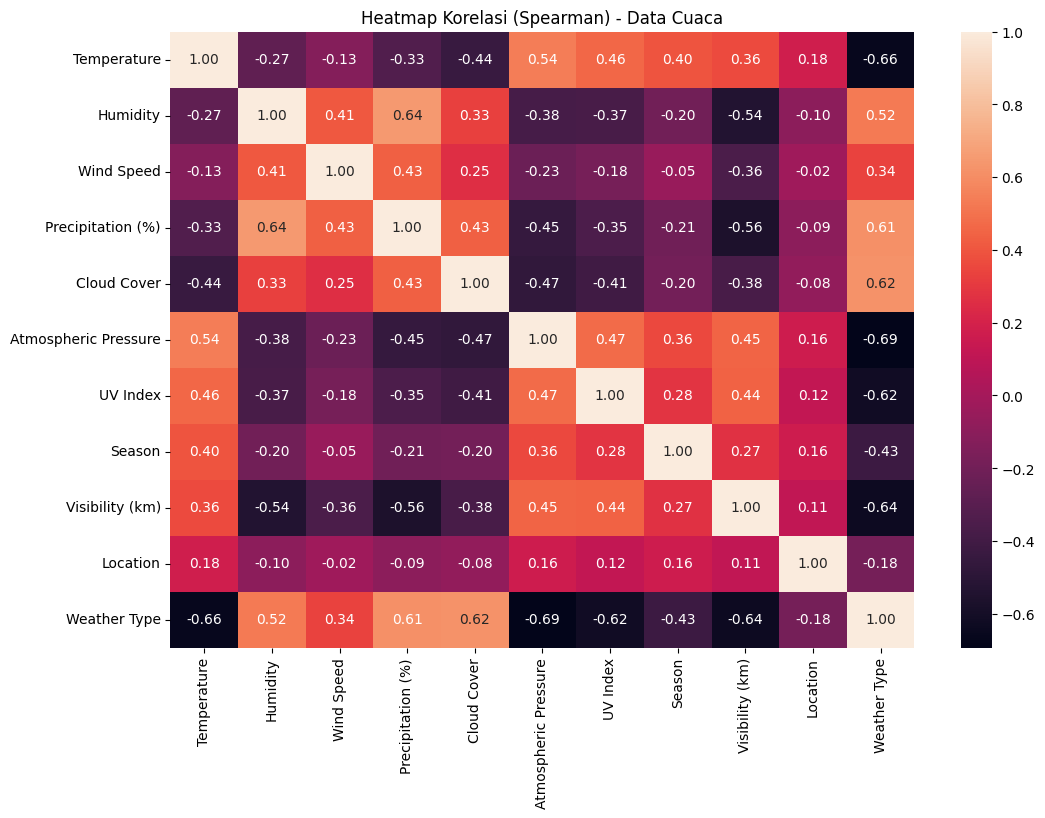

In [12]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(method="spearman")
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Heatmap Korelasi (Spearman) - Data Cuaca")
plt.show()

##Visualisasi Distribusi Label Weather Type

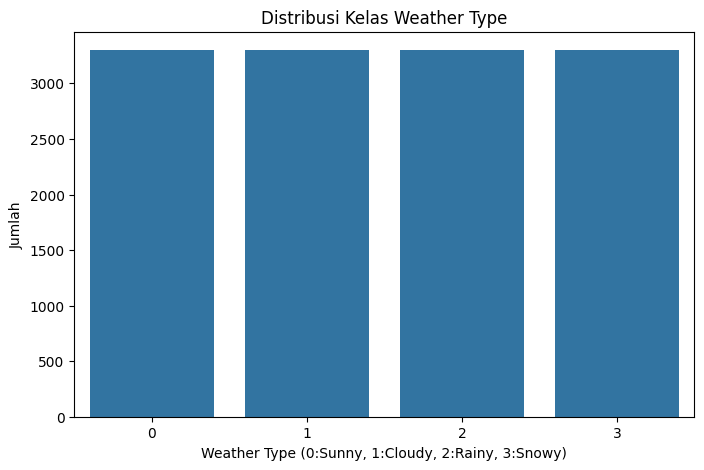

Jumlah per kelas:
Weather Type
2    3300
1    3300
0    3300
3    3300
Name: count, dtype: int64


In [13]:

plt.figure(figsize=(8, 5))
sns.countplot(x="Weather Type", data=df)
plt.title("Distribusi Kelas Weather Type")
plt.xlabel("Weather Type (0:Sunny, 1:Cloudy, 2:Rainy, 3:Snowy)")
plt.ylabel("Jumlah")
plt.show()

print("Jumlah per kelas:")
print(df["Weather Type"].value_counts())

##Split Data & Normalisasi

In [14]:
X = df.drop(columns=["Weather Type"])
y = df["Weather Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # karena kelas seimbang, tetap bagus pakai stratify
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

##GridSearchCV untuk KNN Terbaik

In [15]:
param_grid = {
    "n_neighbors": list(range(1, 31)),          # K = 1..30
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

knn = KNeighborsClassifier()

grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Parameter terbaik:", grid.best_params_)
print("Skor rata-rata CV terbaik:", grid.best_score_)


Parameter terbaik: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Skor rata-rata CV terbaik: 0.8993371212121213


In [16]:
#Training Model Terbaik & Prediksi

best_knn = grid.best_estimator_
best_knn.fit(X_train_scaled, y_train)

y_pred = best_knn.predict(X_test_scaled)

print("Akurasi di data test:", accuracy_score(y_test, y_pred))

Akurasi di data test: 0.8943181818181818


#Classification Report

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       660
           1       0.87      0.88      0.87       660
           2       0.87      0.89      0.88       660
           3       0.92      0.92      0.92       660

    accuracy                           0.89      2640
   macro avg       0.90      0.89      0.89      2640
weighted avg       0.90      0.89      0.89      2640



#Confusion Matrix

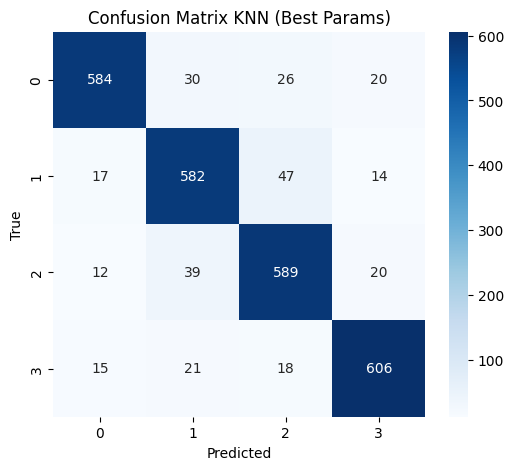

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat visualisasi Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d') # fmt='d' untuk format bilangan bulat
plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#Cross Validation

In [19]:
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring="accuracy")

print("Akurasi per fold:", cv_scores)
print("Rata-rata akurasi:", cv_scores.mean())
print("Standar deviasi   :", cv_scores.std())

Akurasi per fold: [0.88210227 0.90104167 0.90625    0.90577652 0.90151515]
Rata-rata akurasi: 0.8993371212121213
Standar deviasi   : 0.008876294057159465


#Elbow Method KNN

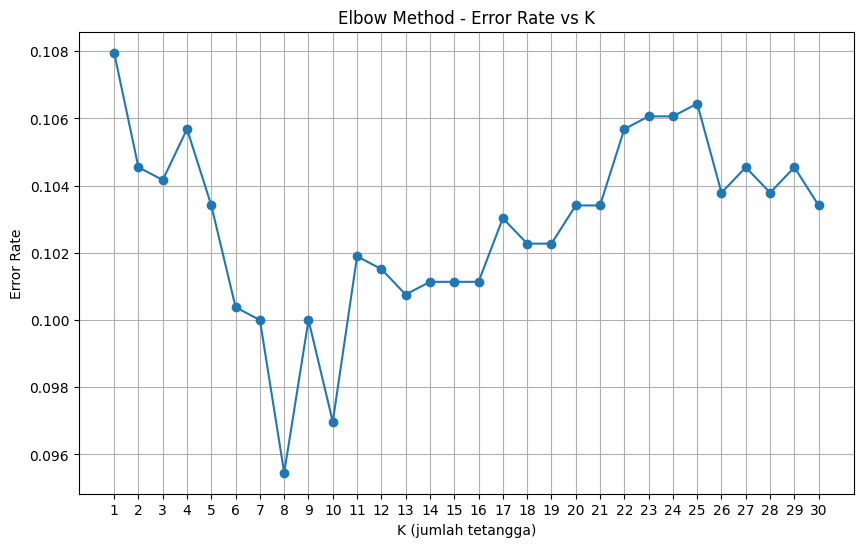

In [21]:
errors = []

for k in range(1, 31):
    # 1. Inisialisasi model KNN untuk nilai k saat ini
    knn_temp = KNeighborsClassifier(n_neighbors=k)

    # 2. Latih model
    # Menggunakan data yang sudah di-SMOTE: x_train_smote dan y_train_smote
    knn_temp.fit(X_train_scaled, y_train)

    # 3. Prediksi pada data uji
    pred = knn_temp.predict(X_test_scaled)

    # 4. Hitung Error Rate (Tingkat Kesalahan)
    # np.mean(pred != y_test) menghitung rata-rata di mana prediksi tidak sama dengan nilai sebenarnya
    errors.append(np.mean(pred != y_test))

# Visualisasi Error Rate terhadap nilai K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("Elbow Method - Error Rate vs K")
plt.xlabel("K (jumlah tetangga)")
plt.ylabel("Error Rate")
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()